In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv('VolveWells.csv')

In [3]:
data.head()

,WELL,DEPTH,GR,AC,ACS,BS,CALI,DEN,NEU,PEF,RDEP,RMED
0,15/9-F-1 C,145.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15/9-F-1 C,146.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15/9-F-1 C,146.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,15/9-F-1 C,146.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15/9-F-1 C,146.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
for well in data["WELL"].unique():
    print(well)
    

15/9-F-1 C
15/9-F-4
15/9-F-7


# Data prepration 

In [5]:
plots_col = ["WELL" , "DEPTH" , "CALI" ,"BS" , "GR" , "NEU" , "DEN" , "PEF" , "RDEP" , "RMED" , "AC" , "ACS"]

In [6]:
data = data[plots_col]

In [7]:
data.head()

,WELL,DEPTH,CALI,BS,GR,NEU,DEN,PEF,RDEP,RMED,AC,ACS
0,15/9-F-1 C,145.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15/9-F-1 C,146.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15/9-F-1 C,146.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,15/9-F-1 C,146.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15/9-F-1 C,146.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The next step involves creating a copy of our dataframe. This will allow us to keep the original dataframe for further work later in a project

In [8]:
data_nan=data.copy()

In [9]:
data_nan.notnull()

,WELL,DEPTH,CALI,BS,GR,NEU,DEN,PEF,RDEP,RMED,AC,ACS
0,True,True,False,False,False,False,False,False,False,False,False,False
1,True,True,False,False,False,False,False,False,False,False,False,False
2,True,True,False,False,False,False,False,False,False,False,False,False
3,True,True,False,False,False,False,False,False,False,False,False,False
4,True,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
66838,True,True,False,True,False,False,False,False,False,False,False,False
66839,True,True,False,False,False,False,False,False,False,False,False,False
66840,True,True,False,False,False,False,False,False,False,False,False,False
66841,True,True,False,False,False,False,False,False,False,False,False,False


In [10]:
for num , col in enumerate (data_nan.columns[2:]):
    data_nan[col]=data_nan[col].notnull()*(num+1)
    data_nan[col].replace(0,num,inplace = True)
    print(col,num)

CALI 0
BS 1
GR 2
NEU 3
DEN 4
PEF 5
RDEP 6
RMED 7
AC 8
ACS 9


In [11]:
data_nan.describe()

,DEPTH,CALI,BS,GR,NEU,DEN,PEF,RDEP,RMED,AC,ACS
count,66843.000000,66843.000000,66843.000000,66843.000000,66843.000000,66843.000000,66843.000000,66843.000000,66843.000000,66843.000000,66843.000000
mean,1915.232292,0.225304,1.983573,2.974732,3.225035,4.223479,5.223479,6.722813,7.723157,8.072034,9.063477
std,1108.591492,0.417786,0.127110,0.156940,0.417608,0.416580,0.416580,0.447613,0.447441,0.258547,0.243821
min,145.900000,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000
25%,910.546200,0.000000,2.000000,3.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000
50%,1850.965600,0.000000,2.000000,3.000000,3.000000,4.000000,5.000000,7.000000,8.000000,8.000000,9.000000
75%,2859.950000,0.000000,2.000000,3.000000,3.000000,4.000000,5.000000,7.000000,8.000000,8.000000,9.000000
max,4093.900000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000


Plotting data

In [12]:
grouped = data_nan.groupby("WELL")

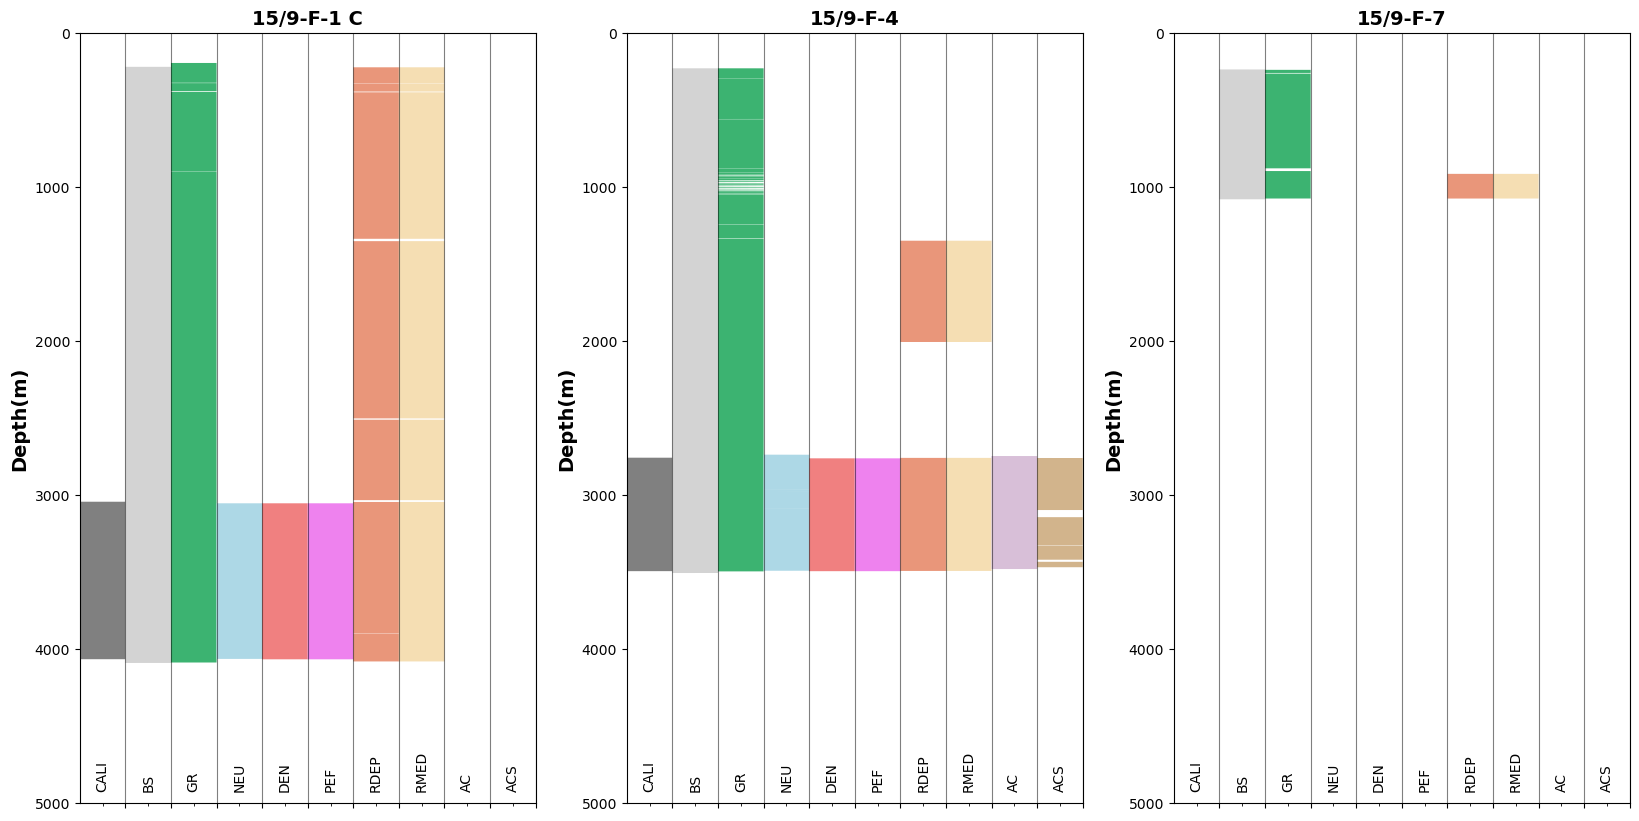

In [40]:
fig , axs = plt.subplots(1 , 3 , figsize=(20,10))

labels = ['CALI', 'BS', 'GR', 'NEU', 'DEN', 'PEF', 'RDEP', 'RMED', 'AC', 'ACS']

for (name , df) , ax in zip (grouped , axs.flat):
    ax.set_xlim(0,9)
    ax.set_ylim(5000,0)
    ax.fill_betweenx(df.DEPTH , 0 , df.CALI , facecolor='grey')
    ax.fill_betweenx(df.DEPTH , 1 , df.BS , facecolor='lightgrey')
    ax.fill_betweenx(df.DEPTH , 2 , df.GR , facecolor='mediumseagreen')
    ax.fill_betweenx(df.DEPTH , 3 , df.NEU , facecolor='lightblue')
    ax.fill_betweenx(df.DEPTH , 4 , df.DEN , facecolor='lightcoral')
    ax.fill_betweenx(df.DEPTH , 5 , df.PEF , facecolor='violet')
    ax.fill_betweenx(df.DEPTH , 6 , df.RDEP , facecolor='darksalmon')
    ax.fill_betweenx(df.DEPTH , 7 , df.RMED , facecolor='wheat')
    ax.fill_betweenx(df.DEPTH , 8 , df.AC , facecolor='thistle')
    ax.fill_betweenx(df.DEPTH , 9 , df.ACS , facecolor='tan')
    
    ax.grid(axis="x" , alpha=0.5 , color='black')
    ax.set_ylabel("Depth(m)" , fontsize=14 , fontweight="bold")
    ax.set_xticks([1,2,3,4,5,6,7,8,9,10], minor=False)
    ax.set_xticks([0.5, 1.5 ,2.5 ,3.5 ,4.5 ,5.5 ,6.5 , 7.5, 8.5, 9.5], minor=True)    
    
    ax.set_xticklabels(labels , rotation="vertical" , minor=True , verticalalignment="bottom")
    ax.set_xticklabels('' , minor=False)
    ax.tick_params(axis="x" , which="minor" , pad=-10)
    
    ax.set_title(name , fontsize=14 , fontweight="bold")

plt.savefig("missingdata_png")
plt.show()



# From this plot we can determine:

15/9-F-1 C

Minor gaps in the gamma ray and resistivity curves. As the gaps appear at same position on both resistivity curves we can make an initial assumption that they may be related to casing shoes. Further investigation would be needed to confirm this.
Nuclear curves (DEN, NEU, PEF) and the caliper are only run over a short section, possibly indicating the zone of interest.
No acoustic curves (AC and ACS)

15/9-F-4

Contains all available curves, with the majority over a small section towards the bottom of the well.
There are multiple gaps in the gamma ray (GR) and acoustic shear (ACS) curves. Could be tool related. Further investigation would reveal the cause.

15/9-F-7

Minimal amount of data present over a short and shallow section.
Only bitsize, gamma ray and resistivity measurements presents.
Could potentially be caused by a tool failure or issues encountered whilst drilling. This information could be confirmed by reviewing the End of Well Reports, if they are available.